<a href="https://colab.research.google.com/github/takacsanna/igy_neveld_fakt/blob/main/hazi4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4. házi feladat

Az OTP Bank záró részvényárainak elemzése

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive
from google.colab import files
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import MeanSquaredError
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from tensorflow.keras.utils import img_to_array

In [2]:
uploaded=files.upload()

Saving otp.xlsx to otp.xlsx


In [26]:
otp=pd.read_excel("otp.xlsx")

In [27]:
otp.head()

,Adj Close
0,1647.877441
1,1688.338989
2,1677.303955
3,1588.289185
4,1563.276611


In [30]:
otp = pd.DataFrame(otp).to_numpy()

Felbontás szeletekre

In [28]:
def split_sequence(sequence, n_steps):
	x, y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps # Az adott szekvencia-darab utolsó eleme
		if end_ix > len(sequence)-1: # Ellenőrizzük nem értünk-e a teljes lista végére
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix] # Kimentjük a szekvencia darabot és az utolsó elemet mint eredményváltozó
		x.append(seq_x)
		y.append(seq_y)
	return np.array(x), np.array(y)

In [31]:
x, y = split_sequence(otp, 10)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [34]:
#normalizer = StandardScaler()
#normalizer.fit(x_train)
#x_train = normalizer.transform(x_train)
#x_test = normalizer.transform(x_test)

AlexNet készítése

In [19]:
input = Input(shape=(10,1))

x=Conv1D(filters=128, kernel_size=3, strides=1, activation='relu')(input)
x=MaxPooling1D(pool_size=2, strides=2)(x)
x=Conv1D(filters=128, kernel_size=3, strides=1, activation='relu')(x)
x =MaxPooling1D(pool_size=2, strides=2)(x)
x=Flatten()(x)

x=Dense(4096, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(4096, activation='relu')(x)
x=Dropout(0.2)(x)

output = Dense(1, activation='linear')(x)


In [20]:
model = keras.Model(input, output)

In [21]:
model.compile(optimizer='adam',
    loss='MSE')


In [22]:
early_stopping_callback = EarlyStopping(patience=5, restore_best_weights=True)

In [23]:
model.fit(x_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping_callback])


Epoch 1/200
103/103 [==============================] - 24s 219ms/step - loss: 2227485.0000 - val_loss: 138181.4531
Epoch 2/200
103/103 [==============================] - 23s 222ms/step - loss: 168728.1875 - val_loss: 125594.5312
Epoch 3/200
103/103 [==============================] - 24s 236ms/step - loss: 152971.6094 - val_loss: 86875.6797
Epoch 4/200
103/103 [==============================] - 23s 224ms/step - loss: 146774.8594 - val_loss: 72463.2656
Epoch 5/200
103/103 [==============================] - 25s 239ms/step - loss: 236280.4531 - val_loss: 162320.6250
Epoch 6/200
103/103 [==============================] - 25s 239ms/step - loss: 180181.2500 - val_loss: 77056.2578
Epoch 7/200
103/103 [==============================] - 24s 231ms/step - loss: 168200.5938 - val_loss: 78755.4453
Epoch 8/200
103/103 [==============================] - 24s 231ms/step - loss: 256154.9688 - val_loss: 80668.5703
Epoch 9/200
103/103 [==============================] - 24s 232ms/step - loss: 139054.3750 - 

In [35]:
AlexNet=keras.Model(input, output)

In [36]:
model.predict(x_test)

array([[6123.1733],
       [2493.638 ],
       [8511.047 ],
       ...,
       [2901.6702],
       [6534.3955],
       [5934.1875]], dtype=float32)

In [37]:
model.evaluate(x_test, y_test)

33/33 [==============================] - 2s 60ms/step - loss: 79736.0000


79736.0

:(

##Képek kipróbálása

Eredeti kód, betanított modell

In [38]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [39]:
class_names = ['repulo', 'auto', 'madar', 'macska', 'szarvas', 'kutya', 'beka', 'lo', 'hajo', 'kamion']

In [40]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [43]:
y_train=to_categorical(y_train, num_classes=len(class_names))
y_test=to_categorical(y_test, num_classes=len(class_names))

In [44]:
input = Input(shape=(32,32,3))

x=Conv2D(filters=64, kernel_size=5, strides=4, activation='relu', padding='same')(input)
x=MaxPooling2D(pool_size=(2,2), strides=2)(x)
x = Conv2D(filters=256, kernel_size=5, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x = Conv2D(filters=384, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=384, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x=Flatten()(x)

x=Dense(4096, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(4096, activation='relu')(x)
x=Dropout(0.2)(x)

output=Dense(len(class_names), activation='softmax')(x)

In [45]:
AlexNet=keras.Model(input, output)

In [46]:
AlexNet.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
AlexNet.fit(x_train, y_train, epochs=200, validation_split=0.1,callbacks=[early_stopping_callback])

Epoch 1/200
1407/1407 [==============================] - 866s 614ms/step - loss: 2.3030 - accuracy: 0.0998 - val_loss: 2.3025 - val_accuracy: 0.1058
Epoch 2/200
1407/1407 [==============================] - 830s 590ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.0976
Epoch 3/200
1407/1407 [==============================] - 818s 582ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3029 - val_accuracy: 0.0976
Epoch 4/200
1407/1407 [==============================] - 824s 586ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.0958
Epoch 5/200
1407/1407 [==============================] - 820s 583ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3030 - val_accuracy: 0.0950
Epoch 6/200
1407/1407 [==============================] - 831s 590ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.0986


In [48]:
AlexNet.predict(x_test)

array([[0.10131327, 0.09863522, 0.09954896, ..., 0.09961635, 0.09928067,
        0.10047716],
       [0.10131327, 0.09863522, 0.09954896, ..., 0.09961635, 0.09928067,
        0.10047716],
       [0.10131327, 0.09863522, 0.09954896, ..., 0.09961635, 0.09928067,
        0.10047716],
       ...,
       [0.10131327, 0.09863522, 0.09954896, ..., 0.09961635, 0.09928067,
        0.10047716],
       [0.10131327, 0.09863522, 0.09954896, ..., 0.09961635, 0.09928067,
        0.10047716],
       [0.10131327, 0.09863522, 0.09954896, ..., 0.09961635, 0.09928067,
        0.10047716]], dtype=float32)

In [49]:
AlexNet.evaluate(x_test, y_test)

313/313 [==============================] - 20s 62ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026247024536133, 0.10000000149011612]

elég szörnyű az accuracy, de nagyon sokáig futott így is

In [50]:
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
her = plt.imread('/content/drive/My Drive/Python kurzus/andme.jpg')

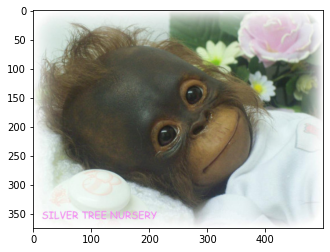

In [55]:
plt.imshow(her)

In [57]:
her = Image.open('/content/drive/My Drive/Python kurzus/andme.jpg')

In [58]:
her = her.resize(size=(32,32))


In [60]:
her = img_to_array(her)

In [63]:
her=her.astype('float32')/255

In [ ]:
AlexNet.predict(kepek)
